In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [26]:
persons = pd.read_csv("../data/adult.csv")
persons = persons.replace("?", np.nan)
persons = persons.dropna()
persons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   education       30162 non-null  object
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   hours-per-week  30162 non-null  int64 
 10  native-country  30162 non-null  object
 11  salary          30162 non-null  object
 12  salary K$       30162 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


# Task 1
Print the count of men and women in the dataset.

In [20]:
result_count = persons["sex"].value_counts()
result_count

Male      20380
Female     9782
Name: sex, dtype: int64

# Task 2
Find the average age of men in dataset

In [24]:
average_men_age = persons[persons["sex"] == "Male"]["age"].mean()
average_men_age

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [32]:
poland_percentage = (len(persons[persons["native-country"] == "Poland"]) / len(persons)) * 100
poland_percentage

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [43]:
rich_people = persons[persons["salary"] == ">50K"]
mean_age_rich_people = rich_people["age"].mean()
std_age_rich_people = rich_people["age"].std()

poor_people = persons[persons["salary"] == "<=50K"]
mean_age_poor_people = poor_people["age"].mean()
std_age_poor_people = poor_people["age"].std()

print(
    f"Mean of te age for people who earn > 50K - {mean_age_rich_people:.2f}\n"
    f"Standard deviation of the age for people who earn > 50K - {std_age_rich_people:.2f}\n"
    f"Mean of te age for people who earn <= 50K - {mean_age_poor_people:.2f}\n"
    f"Standard deviation of the age for people who earn <= 50K - {std_age_poor_people:.2f}\n"
)

Mean of te age for people who earn > 50K - 43.96
Standard deviation of the age for people who earn > 50K - 10.27
Mean of te age for people who earn <= 50K - 36.61
Standard deviation of the age for people who earn <= 50K - 13.46


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [45]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
people_without_high_education = persons[(persons["education"].isin(higher_education) == False) & (persons["salary"] == ">50K")]
people_without_high_education

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [49]:
grouped_by_age = persons.groupby("education")["age"]
grouped_by_age.describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [74]:
men = persons[persons["sex"] == "Male"]
married_men = men[men["marital-status"].str.contains("Married")]
average_salary_married_men = married_men["salary K$"].mean()

non_married_men = men[~men["marital-status"].str.contains("Married")]
average_salary_non_married_men = non_married_men["salary K$"].mean()
print(
    f"Married men earn on average - {average_salary_married_men:.2f} K$\n"
    f"Non-married men earn on average - {average_salary_non_married_men:.2f} K$"
)

Married men earn on average - 107.49 K$
Non-married men earn on average - 46.60 K$


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [81]:
max_hours_per_week = persons["hours-per-week"].max()
people_with_max_hours = len(persons[persons["hours-per-week"] == max_hours_per_week])
print(f"Number of people who works {max_hours_per_week} hours per week - {people_with_max_hours}")

Number of people who works 99 hours per week - 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

<Axes: >

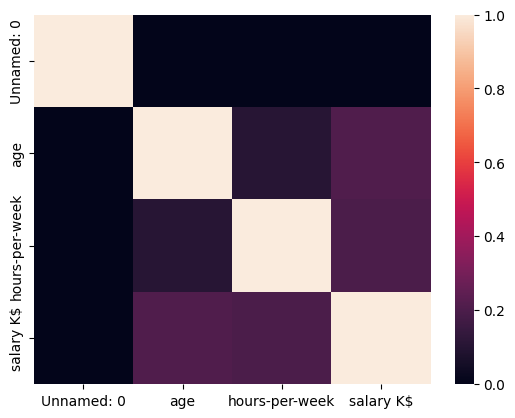

In [88]:
import seaborn as sns
corr = persons.corr()
sns.heatmap(corr)